<a href="https://colab.research.google.com/github/seokjinwoo/EconBigData/blob/main/lec7_%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5장(6장 일부분)

## 기대값(expectation)

- 평균, 기대값, 기대치, 평균치, 평균값
- mean, expectation, average
- 확률분포의 중심(central tendency), 위치(location)
- 평균비용(average cost): *전형적인 단위*(typical unit)의 생산비용.

### 이산확률변수

- 이산확률변수: countable 한 값을 갖는 확률변수

- 확률변수 $X$의 기대값: 평균(mean), $\mu$
  - 분포의 중심을 나타내는 통계량 중 하나임

$$
E[X] = \sum_{i=1}^n x_i \Pr(X = x_i) = \mu
$$

- 분포가 얼마나 퍼져있는지(dispersion)
- 이것도 기대값으로 정의할 수 있음: 분산(variance)

$$
var(X) = E[(X - \mu)^2] = \sum_{i=1}^n (x_i - \mu)^2 \Pr(X = x_i) = \sigma^2
$$


### 연속확률변수

-$X$가 연속확률변수: uncoutable 값을 갖는 경우

- 확률밀도함수 pdf 를 이용해서 정의해야 함

$$
E[X] = \int_{A} x f(x) dx = \mu
$$

$A$는 확률변수 $X$가 정의되는 구간

- 분산은 같은 형태로 정의할 수 있음


$$
var[X] = \int_{A} (x - \mu)^2 f(x) dx = \sigma^2
$$



## 중앙값, 중위수(median)

- 분포의 중심을 나타내는 또 하나의 통계량
- 중위수 아래로 전체의 50%가 있고, 위로도 50%가 있음
- median은 다음과 같이 분포함수 $F$를 이용하여 정의가 됨

$$
F(med) = 0.5
$$



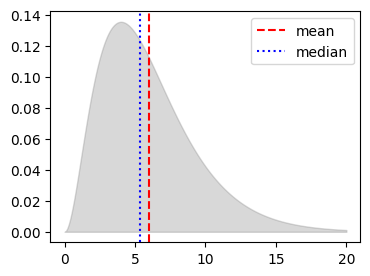

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# paramters
n = 6 # degree of freedom
x = np.linspace(0, 20, 200)
y = chi2.pdf(x, n)

mean = chi2.mean(n)
# print(mean)
median = chi2.median(n)
# print(median)


# plot
plt.figure(figsize = (4,3))

# add median to the figure with a blue vertical line
plt.fill_between(x, y, color='gray', alpha=0.3)
plt.axvline(x = mean, color = 'red', linestyle='--', label='mean')
plt.axvline(x = median, color = 'blue', linestyle=':', label='median')
plt.legend()
plt.show()

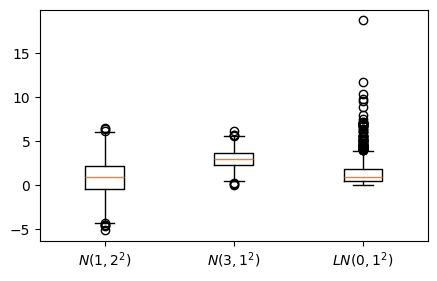

In [ ]:
## Box plot

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
y1 = np.random.normal(1,2,1000)
y2 = np.random.normal(3,1,1000)
y3 = np.exp(np.random.normal(0,1,1000))         # LN(0,1) 의 box plot을 추가해보시오

plt.figure(figsize =(5,3))
plt.boxplot([y1, y2, y3], tick_labels=['$N(1,2^2)$', '$N(3,1^2)$', '$LN(0,1^2)$'])
plt.show()

## 다변량(multivaraite) 분석

- 확률변수 2개 이상
- 수요함수: P(가격) → Q(수요량)
- 물가: M(통화량) → P(prices), 인플레이션
- 재정: G(정부지출) → C(소비)

- 확률변수 $X$, $Y$의 관계
  - 두 변수의 **인과관계**(causal relation), economic science
  - 두 변수 간의 상관관계(correlation)
  - prediction, forecasting, 예측

- 두 확률변수가 어떤 방향으로 같이 움직이느냐?

- 공분산(covariance)

$$
cov(X,Y) = E [ (X - \mu_X) (Y - \mu_Y)  ]
$$

- 공분산을 적절히 정규화 시켜서 새로운 지표를 만든다

- 상관계수(correlation coefficient)
  - -1과 1사이의 숫자로 만든다.

$$
\rho_{X,Y} = \frac{cov(X,Y)}{\sqrt{var(X)} \sqrt{var(Y)}}
$$  





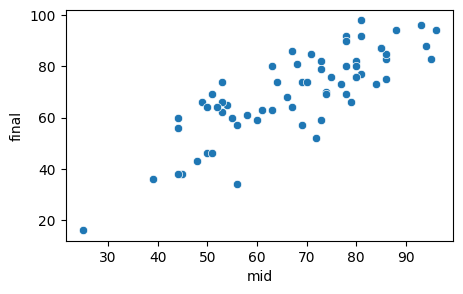

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 툴(한글이 깨질 때가 많음)

df = pd.read_csv('/content/mid_final_scores.txt', sep = '\t')
# df.head()

# 가로에는 중간고사(mid), 세로축에는 기말고사(final)
# 산포도로 그려보시오.

plt.figure(figsize=(5,3))

sns.scatterplot(data = df, x = 'mid', y = 'final')
plt.xlabel('mid')
plt.ylabel('final')
plt.show()


# plt.scatter(df['mid'], df['final'])
# plt.xlabel('mid')
# plt.ylabel('final')
plt.show()






*   **`darkgrid`**: (Default) Uses a dark background with a grid.
*   **`whitegrid`**: Uses a white background with a grid.
*   **`dark`**: Uses a dark background without a grid.
*   **`white`**: Uses a white background without a grid.
*   **`ticks`**: Similar to `white` but with ticks on the axes.

You can also combine themes with context settings like `'paper'`, `'notebook'` (default), `'talk'`, and `'poster'` to control the scaling of elements.

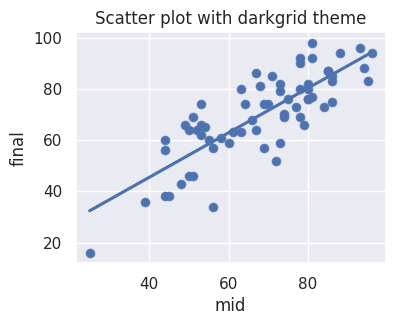

In [ ]:
# Example of setting a theme
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataframe again for demonstration purposes
df = pd.read_csv('/content/mid_final_scores.txt', sep = '\t')

# Set the 'whitegrid' theme
sns.set_theme(style="darkgrid")

plt.figure(figsize=(4,3))
sns.scatterplot(data = df, x = 'mid', y = 'final')
sns.regplot(data = df, x = 'mid', y = 'final', ci=False)
plt.xlabel('mid')
plt.ylabel('final')
plt.title('Scatter plot with darkgrid theme')
plt.show()

# You can reset the theme to default using:
# sns.reset_orig()

Try changing `style="whitegrid"` to other themes like `"darkgrid"`, `"dark"`, `"white"`, or `"ticks"` to see how they affect the plot's appearance. You can also add a context, for example, `sns.set_theme(style="whitegrid", context="talk")`.